# House Prices - Advanced Regression Techniques
Predict sales prices and practice feature engineering, RFs, and gradient boosting

## Step 1: Importing librareis

In [1]:
# Data wrangling
import numpy as np
import pandas as pd

# ploting
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning algos
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost

## Step 2: Importing dataset

In [2]:
train = pd.read_csv('files/train.csv')
test = pd.read_csv('files/test.csv')

In [3]:
# Concat trani & test dataset
data=pd.concat((train, test)).reset_index(drop=True)

In [4]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [7]:
# Correlation
corr = data.corr()
corr_by_SalePrice =  corr[['SalePrice']].sort_values(by='SalePrice',ascending=False)
corr_by_SalePrice.style.background_gradient(cmap='viridis', axis=None)

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


## Step 3: Handling NaN values

In [8]:
# Total nan values in data
data.isnull().sum().sort_values(ascending=False)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
SalePrice       1459
                ... 
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
HeatingQC          0
Length: 81, dtype: int64

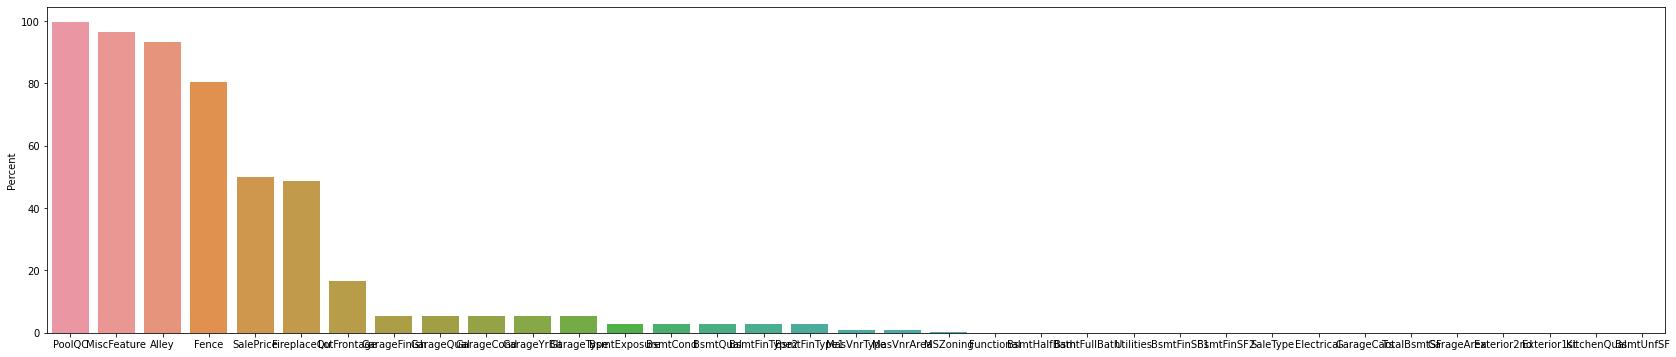

In [9]:
def missing_data(data):
    """Plot nan values"""
    total = data.isnull().sum().sort_values(ascending=False)  # total nan count
    percent =total/len(data)*100                               # % of nan values
    missing_data = pd.concat([total,percent], axis=1, keys=['Total','Percent'])
    # print(missing_data)
    plt.figure(figsize=(29,6))
    plt.xticks()
    # print(missing_data[missing_data['Percent']>0].Percent)
    sns.barplot(x=missing_data[missing_data['Percent']>0].index, # Index of missing data in cloumn more than 0%
     y=missing_data[missing_data['Percent']>0].Percent)    # Values of missing data in cloumn more than 0%

# Plot every column w.r.t high nan values
missing_data(data)

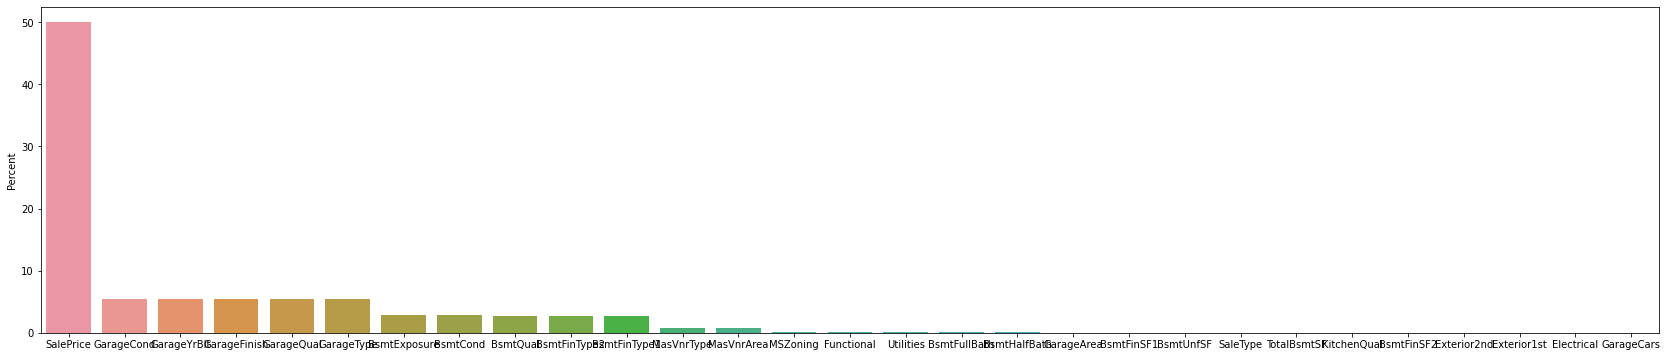

In [10]:
def drop_columns(data):
    """Droping high nan value column"""
    drop_columns=['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage']
    return data.drop(drop_columns,1)

# Drop cloumns which having high nan values
data=drop_columns(data)

# Plot less nan contanid data
missing_data(data)

In [11]:
def fill_nan_by_mean_median(data):
    """Filling missing values
    ---------------------------
    float64: median of whole column
    object: mode of whole column
    """
    nan_columns=data.columns[data.isnull().any()]
    for i in nan_columns:
        if(data[i].dtypes=="object"):
            data[i]=data[i].fillna(data[i].mode()[0])
        else:
            data[i]=data[i].fillna(data[i].median())
    return data

# Filling missing values
fill_nan_by_mean_median(data)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2006,WD,Normal,163000.0
2915,2916,160,RM,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,4,2006,WD,Abnorml,163000.0
2916,2917,20,RL,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2006,WD,Abnorml,163000.0
2917,2918,85,RL,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,700,7,2006,WD,Normal,163000.0


In [12]:
# Checking nan values
data.isnull().sum().sort_values(ascending=False)

Id              0
GarageYrBlt     0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
               ..
MasVnrArea      0
MasVnrType      0
Exterior2nd     0
Exterior1st     0
SalePrice       0
Length: 75, dtype: int64

In [13]:
# Catagorical data that needs to be label encoded
categorical = (data.dtypes == "object")
categorical_list = list(categorical[categorical].index)
print(categorical_list)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [14]:
def encodee():
    """Encode catagorical data
    --------------------------
    """
    for i in categorical_list:
        encode=LabelEncoder()
        data[i]=encode.fit_transform(data[i])

# Encode catagorical data
encodee()
data.head(3)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,8450,1,3,3,0,4,0,...,0,0,0,0,0,2,2008,8,4,208500.0
1,2,20,3,9600,1,3,3,0,2,0,...,0,0,0,0,0,5,2007,8,4,181500.0
2,3,60,3,11250,1,0,3,0,4,0,...,0,0,0,0,0,9,2008,8,4,223500.0


## Step 4: Splitting dataset

In [15]:
# Spliting data set from given condition
df_train=data[:1460]
df_test=data[1460:]

print(data.shape)

print(df_train.shape)
print(df_test.shape)

X = df_train.drop(['SalePrice'],1)
y = df_train['SalePrice']

# Drop  column from test data
df_test=df_test.drop(['SalePrice'],1)

(2919, 75)
(1460, 75)
(1459, 75)


## Step 5: Feature Scaling

In [16]:
# Feature sclaining to compare non logical comparable 
scaler = StandardScaler()
X=scaler.fit_transform(X)
df_test=scaler.transform(df_test)

## Step 6: Machine learning

In [17]:
def BestMLAlgo():
    """Identify best Algo on given dataset"""
    models = {
        'xgboost': [xgboost.XGBRFRegressor()],
        'linearRegression': [LinearRegression()],
        'KNeighborsRegressor': [KNeighborsRegressor()],
        'LogisticRegression': [LogisticRegression()],
        'DecisionTreeRegressor': [DecisionTreeRegressor()],
        'RandomForestRegressor': [RandomForestRegressor()],
        'GradientBoostingRegressor': [GradientBoostingRegressor(random_state=58,n_estimators=500,loss='huber',max_depth=3,max_features=25)],
    }
    x_train=X[:1350]
    y_train=y[:1350]
    x_test=X[1350:]
    y_test=y[1350:]
    i=0

    highest_score = 0
    best_model = ""
    best_pred = None
    for model_name, model in models.items():
        model[0].fit(x_train, y_train)
        predicted = model[0].predict(x_test)
        score = model[0].score(x_test, y_test)
        print(f"{model_name}: {score}")
        if score > highest_score:
            highest_score = score
            best_model = model_name
            best_pred = predicted
    
BestMLAlgo()

xgboost: 0.8781028324397429
linearRegression: 0.9051416356829042
KNeighborsRegressor: 0.807969931833719
C:\Users\hamza\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
LogisticRegression: 0.0
DecisionTreeRegressor: 0.8026093181277936
RandomForestRegressor: 0.9059596649660764
GradientBoostingRegressor: 0.8918114938183588


I choose here RandomForestRegressor as it gave 90.7% score

In [18]:
# Applied Best ML algo on test dataset
model = RandomForestRegressor()
model.fit(X, y)
predicted=model.predict(df_test)
predicted

array([126446.  , 152730.  , 174911.7 , ..., 147607.55, 114505.5 ,
       230391.48])

In [19]:
# Wring csv file with id & SalePrice columns 
indexes=[i for i in range(1461,2920 ,1)]
my_submission=pd.DataFrame(indexes,columns=['Id'])
my_submission['SalePrice']=predicted
my_submission.to_csv('submission.csv', index=False)